<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 8

_**Group Members:**_ Phillip Sievers, Gordon Liang, Jose Pablo Rivera 

### Problem 0 (3 points)

## Part 1: The Chain Rule for Differentiation 

### Problem 1.1 (Exam Style)

### Problem 1.2

Forward pass (final output): 0.8660254037844387
Backward pass (derivative at input): 0.20186662321012816
[1.0, np.float64(0.8074664928405124), np.float64(0.20186662321012816)]


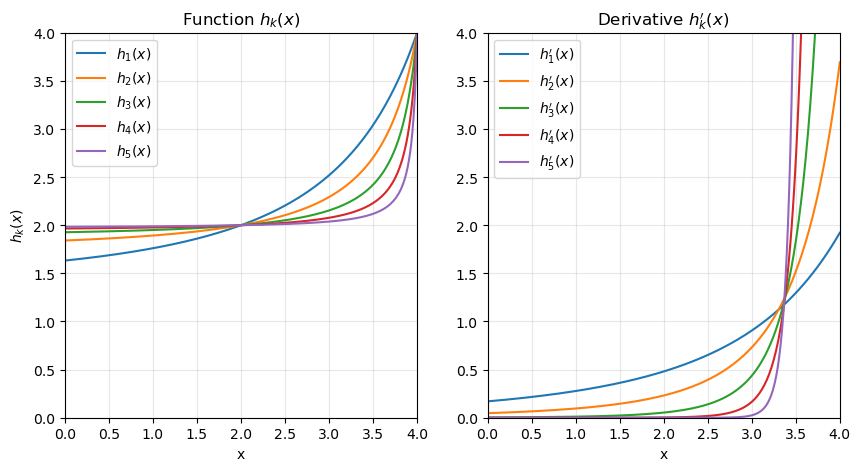

In [18]:
from autograd import grad, numpy as anp
from matplotlib import pyplot as plt
import numpy as np

def forward(functions, x):
    values = [x]
    for f in functions:
        x = f(x)
        values.append(x)
    return values
    
def backward(functions, values):
    gradients = [1.0]
    values = values[:len(values)-2] # drop y0
    for f, v in zip(reversed(functions), values):
        g = grad(f)(v) * anp.prod(gradients)
        gradients.append(g)
    return gradients

def chain(functions, x, print_it=False):
    values = forward(functions, x)
    gradients = backward(functions, values)
    if print_it:    
        print("Forward pass (final output):", values[-1])
        print("Backward pass (derivative at input):", gradients[-1])
    return gradients

# from 1.1 
functions = [lambda x: anp.log(x), lambda x: anp.arctan(x), lambda x: anp.sin(x)]
x = anp.exp(anp.sqrt(3))
print(chain(functions, x, print_it=True))

p = anp.sqrt(2)

def make_functions(p, k): 
    h1 = lambda x: p**x
    hs = [h1]
    for i in range(k):
        h = lambda x: p**h1(x)
        hs.append(h)
    return hs

# Plot setup
x_vals = np.linspace(0, 4, 300)
k_values = [1, 2, 3, 4, 5]
p = anp.sqrt(2)

# Plot h_k(x)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for k in k_values:
    functions = make_functions(p, k)
    y_vals = []
    for x in x_vals:
        result = x
        for f in functions:
            result = f(result)
        y_vals.append(result)
    plt.plot(x_vals, y_vals, label=f'$h_{k}(x)$')
plt.xlabel('x')
plt.ylabel('$h_k(x)$')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title('Function $h_k(x)$')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot h_k'(x)
plt.subplot(1, 2, 2)
for k in k_values:
    functions = make_functions(p, k)
    derivative_vals = []
    for x in x_vals:
        gradients = chain(functions, x)
        derivative_vals.append(gradients[-1])
    plt.plot(x_vals, derivative_vals, label=f'$h_{k}\'(x)$')
plt.xlabel('x')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title('Derivative $h_k\'(x)$')
plt.legend()
plt.grid(True, alpha=0.3)


### Problem 1.3 (Exam Style)

## Part 2: Back-Propagation for a Multi-Layer Perceptron

### Problem 2.1 (Exam Style)

### Answer) 

$U \in \Reals^{\beta\times\alpha}$

$\textbf{b} \in \Reals^\beta $ 

$V \in \Reals^{\delta\times\gamma}$

$\textbf{c} \in \Reals^\delta $

### Problem 2.2 (Exam Style)

$$
\begin{align}
\textbf{p} &= \begin{bmatrix}
-1 \\
3 \\
2
\end{bmatrix} \\
\textbf{q} &= \begin{bmatrix}
0 \\
3 \\
2
\end{bmatrix} \\
\textbf{z} &= \begin{bmatrix}
1 \\
-3
\end{bmatrix}
\end{align}
$$

### Problem 2.3 (Exam Style)

$$
\begin{align}
\lambda &= \frac{1}{2}||\textbf{z} - \textbf{y}||^2 \\
&= \frac{1}{2}\sum^d_{i=0}(z_i - y_i)^2 \\

\lambda_z &= \frac{\partial \lambda}{\partial \textbf{z}} \frac{1}{2}\sum^d_{i=0}(z_i - y_i)^2 \\
&= \sum^d_{i=0}(z_i - y_i) \\
&= \textbf{z} - \textbf{y}
\end{align}
$$
If we plug in our values we get: 
$$
\begin{align}
\lambda_z &= \textbf{z} - \textbf{y} \\
&= \begin{bmatrix}
1 \\
-3
\end{bmatrix} -
\begin{bmatrix}
-1 \\
1
\end{bmatrix} \\
&= \begin{bmatrix}
2 \\
-4
\end{bmatrix}
\end{align}
$$

### Problem 2.4 (Exam Style)

### Problem 2.5 (Exam Style)

### Problem 2.6 (Exam Style)

### Problem 2.7 (Exam Style)